# General Fact Check Claims Analysis
The notebook analyzes the claims data published by a selection of reliable sources. The dataset is downloaded from the Google Fact Check Tools API. The scraping was performed on 2025-02-18.

In [1]:
import pandas as pd
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.util import load_claims_from_file, convert_claims_to_dataframe

In [2]:
claims = load_claims_from_file('../data/raw/fact_claims_1739933287.json')
df = convert_claims_to_dataframe(claims)

display(df.head(10))

,text,claimant,claimDate,publisherName,publisherSite,reviewUrl,reviewTitle,reviewDate,textualRating
0,Pennsylvania Gov. Josh Shapiro is “being charg...,Facebook post,2025-02-10 00:00:00+00:00,PolitiFact,politifact.com,https://www.politifact.com/factchecks/2025/feb...,"No, Pennsylvania Gov. Josh Shapiro wasn’t char...",2025-02-14 00:00:00+00:00,Pants on Fire!
1,Former USAID Administrator Samantha Power’s ne...,Mario Nawfal,2025-02-09 00:00:00+00:00,PolitiFact,politifact.com,https://www.politifact.com/factchecks/2025/feb...,Former USAID head Samantha Power’s wealth didn...,2025-02-14 00:00:00+00:00,False
2,"""We found fraud and abuse, I would say those t...",President Donald Trump,2025-02-11 00:00:00+00:00,PolitiFact,politifact.com,https://www.politifact.com/article/2025/feb/13...,"Trump, Musk claim government 'fraud' without s...",2025-02-13 00:00:00+00:00,"So far, the Trump White House has not shown ev..."
3,“Breaking news: Taylor Swift officially banned...,Facebook posts,2025-02-04 00:00:00+00:00,PolitiFact,politifact.com,https://www.politifact.com/factchecks/2025/feb...,You need to calm down. Taylor Swift has not be...,2025-02-07 00:00:00+00:00,False
4,Early reports of four survivors show “this DC ...,Facebook posts,2025-01-30 00:00:00+00:00,PolitiFact,politifact.com,https://www.politifact.com/factchecks/2025/feb...,Initial reports that people survived Potomac p...,2025-02-07 00:00:00+00:00,False
5,President Bill Clinton also offered federal em...,Social media,2025-02-02 00:00:00+00:00,PolitiFact,politifact.com,https://www.politifact.com/article/2025/feb/06...,"Yes, Bill Clinton offered mass federal employe...",2025-02-06 00:00:00+00:00,"Under Clinton, the government offered mass buy..."
6,Video shows President Donald Trump saying Mexi...,Instagram posts,2025-01-30 00:00:00+00:00,PolitiFact,politifact.com,https://www.politifact.com/factchecks/2025/feb...,Did Donald Trump say Mexicans call him ‘peachy...,2025-02-06 00:00:00+00:00,False
7,From the U.S. Agency for International Develop...,"U.S. Rep. Brian Mast, R-Fla.",2025-02-02 00:00:00+00:00,PolitiFact,politifact.com,https://www.politifact.com/factchecks/2025/feb...,Does as little as 10% of USAID go to help peop...,2025-02-05 00:00:00+00:00,False
8,Photo shows Black Hawk helicopter pilot in fat...,Instagram post,2025-02-02 00:00:00+00:00,PolitiFact,politifact.com,https://www.politifact.com/factchecks/2025/feb...,"No, this photo does not show fallen Army pilot...",2025-02-03 00:00:00+00:00,False
9,“Pilot of Blackhawk helicopter that crashed in...,Facebook posts,2025-01-31 00:00:00+00:00,PolitiFact,politifact.com,https://www.politifact.com/factchecks/2025/jan...,Social media posts misidentify transgender pil...,2025-01-31 00:00:00+00:00,Pants on Fire!


In [3]:
# Calculate and display the number of null values in each column
null_counts = df.isnull().sum()
print("\nNumber of null values in each column:")
print(null_counts)

# Calculate percentage of null values
null_percentages = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of null values in each column:")
print(null_percentages.round(2))

# Display total number of rows
total_rows = len(df)
print(f"\nTotal number of rows: {total_rows}")



Number of null values in each column:
text                 0
claimant         18610
claimDate        18831
publisherName        0
publisherSite        0
reviewUrl            0
reviewTitle          0
reviewDate       11249
textualRating        0
dtype: int64

Percentage of null values in each column:
text              0.00
claimant         35.51
claimDate        35.93
publisherName     0.00
publisherSite     0.00
reviewUrl         0.00
reviewTitle       0.00
reviewDate       21.46
textualRating     0.00
dtype: float64

Total number of rows: 52408


In [4]:
df = df.drop_duplicates()

In [5]:
# Calculate and display the number of null values in each column
null_counts = df.isnull().sum()
print("\nNumber of null values in each column:")
print(null_counts)

# Calculate percentage of null values
null_percentages = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of null values in each column:")
print(null_percentages.round(2))

# Display total number of rows
total_rows = len(df)
print(f"\nTotal number of rows: {total_rows}")


Number of null values in each column:
text                 0
claimant         18608
claimDate        18827
publisherName        0
publisherSite        0
reviewUrl            0
reviewTitle          0
reviewDate       11176
textualRating        0
dtype: int64

Percentage of null values in each column:
text              0.00
claimant         35.73
claimDate        36.15
publisherName     0.00
publisherSite     0.00
reviewUrl         0.00
reviewTitle       0.00
reviewDate       21.46
textualRating     0.00
dtype: float64

Total number of rows: 52082


## Time Analysis

In [6]:
# Get date ranges for claim dates and review dates
claim_date_range = {
    'earliest': pd.to_datetime(df['claimDate'].min()),
    'latest': pd.to_datetime(df['claimDate'].max())
}

review_date_range = {
    'earliest': pd.to_datetime(df['reviewDate'].min()),
    'latest': pd.to_datetime(df['reviewDate'].max())
}

print("\nClaim Date Range:")
print(f"Earliest: {claim_date_range['earliest']}")
print(f"Latest: {claim_date_range['latest']}")

print("\nReview Date Range:")
print(f"Earliest: {review_date_range['earliest']}")
print(f"Latest: {review_date_range['latest']}")



Claim Date Range:
Earliest: 1958-05-09 00:00:00+00:00
Latest: 2106-11-08 00:00:00+00:00

Review Date Range:
Earliest: 1995-09-24 17:00:00+00:00
Latest: 2025-02-18 17:53:10+00:00


/tmp/ipykernel_2644599/2328066461.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month_year'] = df['claimDate'].dt.to_period('M')


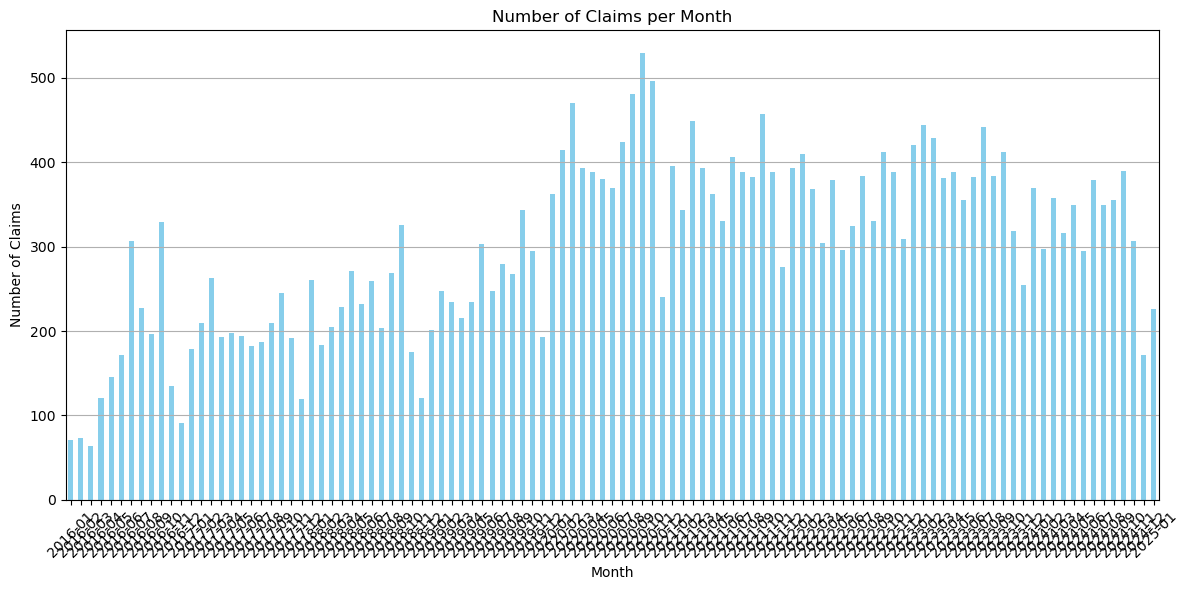

In [14]:
import matplotlib.pyplot as plt

# Convert claimDate to datetime
df['claimDate'] = pd.to_datetime(df['claimDate'])

# Extract month and year from claimDate
df['month_year'] = df['claimDate'].dt.to_period('M')

# Count the number of claims per month
monthly_claims = df['month_year'].value_counts().sort_index()

# Filter to only include claims from 2017 onwards and before 2025-02
monthly_claims = monthly_claims[(monthly_claims.index >= '2016-01') & (monthly_claims.index < '2025-02')]

# Plotting
plt.figure(figsize=(12, 6))
monthly_claims.plot(kind='bar', color='skyblue')
plt.title('Number of Claims per Month')
plt.xlabel('Month')
plt.ylabel('Number of Claims')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


/tmp/ipykernel_2644599/4029165139.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['quarter_year'] = df['claimDate'].dt.to_period('Q')


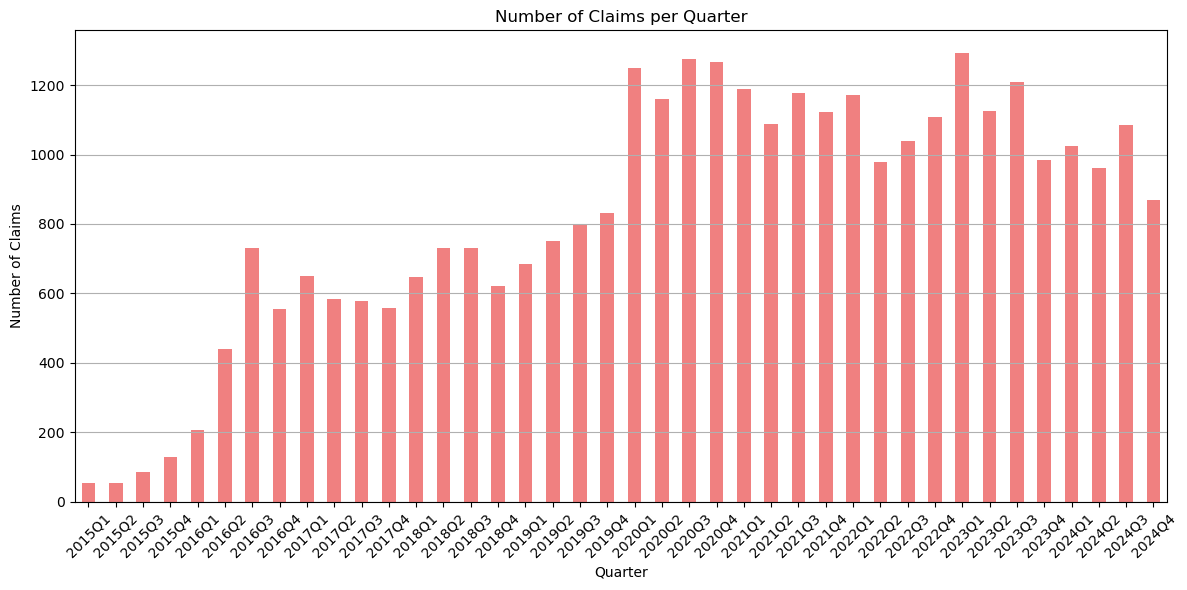

In [16]:
# Extract quarter and year from claimDate
df['quarter_year'] = df['claimDate'].dt.to_period('Q')

# Count the number of claims per quarter
quarterly_claims = df['quarter_year'].value_counts().sort_index()

# Filter to only include claims from 2017 onwards and before 2025-02
quarterly_claims = quarterly_claims[(quarterly_claims.index >= '2015Q1') & (quarterly_claims.index < '2025Q1')]

# Plotting
plt.figure(figsize=(12, 6))
quarterly_claims.plot(kind='bar', color='lightcoral')
plt.title('Number of Claims per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Claims')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Source Analysis

In [6]:
# Create a new DataFrame for claimants and their claim counts
claimant_counts = df['claimant'].value_counts().reset_index()
claimant_counts.columns = ['Claimant', 'Number of Claims']

# Display the top 20 claimants
top_claimants = claimant_counts.head(20)
display(top_claimants)

,Claimant,Number of Claims
0,Donald Trump,3397
1,Social media,2635
2,social media users,2512
3,Facebook posts,1643
4,Facebook user,1263
5,Viral image,1192
6,Social media users,1081
7,Multiple sources,993
8,Joe Biden,732
9,Public,603


## Publisher Analysis

In [17]:
# Create a new DataFrame for publishers and their claim counts
publisher_counts = df['publisherSite'].value_counts().reset_index()
publisher_counts.columns = ['Publisher', 'Number of Claims']

# Count the number of reviews with None publisher
none_publisher_count = df['publisherSite'].isnull().sum()
print(f"Number of reviews with None publisher: {none_publisher_count}")

# Display the top 15 publishers
top_publishers = publisher_counts.head(20)
display(top_publishers)

Number of reviews with None publisher: 0


,Publisher,Number of Claims
0,snopes.com,18026
1,politifact.com,11945
2,fullfact.org,6003
3,usatoday.com,4751
4,factcheck.org,3431
5,apnews.com,2374
6,factcheck.afp.com,1957
7,washingtonpost.com,1706
8,science.feedback.org,1090
9,nytimes.com,507


## Rating Analysis

In [18]:
# Group by the rating and count the number of claims for each rating
rating_counts = df['textualRating'].str.lower().value_counts().reset_index()
rating_counts.columns = ['Rating', 'Number of Claims']

# Display the top 20 rating counts
display(rating_counts.head(20))

,Rating,Number of Claims
0,false,18313
1,true,4028
2,mostly false,2171
3,pants on fire,1936
4,mixture,1639
5,mostly true,1490
6,half true,1189
7,misleading,1042
8,labeled satire,980
9,unproven,912
